[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
Questão 3
 ---------------------------------- 
search_in(int_list, val)
 ---------------------------------- 
a: 1.8194290792702564e-07
b: 1.5054281123281855e-07
 ---------------------------------- 
search_pes(int_list, val)
 ---------------------------------- 
a: 1.5985712837261547e-07
b: 1.477428408439404e-07
 ---------------------------------- 
search_bin(int_list, val)
 ---------------------------------- 
a: 2.3188560070203882e-07
b: 1.5188569315276775e-07
 ---------------------------------- 
search_in(int_array, val)
 ---------------------------------- 
a: 1.5994280277352247e-07

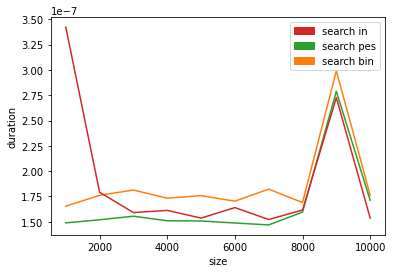


Questão 6
 ---------------------------------- 
search_in(int_list, val)
 ---------------------------------- 
a: 1.6548573122625905e-07
b: 1.4685709694666523e-07
 ---------------------------------- 
search_pes(int_list, val)
 ---------------------------------- 
a: 1.5974279189582116e-07
b: 1.5834292363641518e-07
 ---------------------------------- 
search_bin(int_list, val)
 ---------------------------------- 
a: 1.5242853156191164e-07
b: 1.8757140683841759e-07
 ---------------------------------- 
search_in(int_array, val)
 ---------------------------------- 
a: 1.6528572034855772e-07
b: 1.8037137903905075e-07
 ---------------------------------- 
search_pes(int_array, val)
 ---------------------------------- 
a: 1.5128581643304122e-07
b: 1.4648576325271278e-07
 ---------------------------------- 
search_bin(int_array, val)
 ---------------------------------- 
a: 2.403999782732821e-07
b: 1.5540005863710705e-07


In [44]:
import numpy
from numpy import random as r
from timeit import repeat
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# i.
# gerar uma colecção aleatória de inteiros numa lista
# inteiros devem pertencer ao intervalo [1, 1000000]

# ! o enunciado não diz quantos inteiros devem ser !

def generate_random_int_list(length):
    int_list = []
    for i in range(length):
        int_list.append(r.randint(1, 100000))
    return int_list


def generate_random_int_array(length):
    return r.randint(1, 100000, size=length)


# 2
def search_in(collection, val):
    if isinstance(collection, list):
        if val in collection:
            return collection.index(val)
        else:
            return -1
    elif isinstance(collection, numpy.ndarray):
        if val in collection:
            return numpy.argmax(collection == val)
    else:
        return -1

def search_pes(collection, val):
    for num in collection:
        if num == val:
            return collection.index(val)
    return -1

def search_bin(collection, val):
    if isinstance(collection, list):
        collection.sort()
        return binarySearch(collection, len(collection), val)

    elif isinstance(collection, numpy.ndarray):
        sorted = numpy.sort(collection)
        return binarySearch(sorted, sorted.size, val)

#devolve duração média dada uma lista de durações
def get_avg_duration(search_func, nr_of_calls):
    duration_list = repeat(lambda: search_func, number=1, repeat=nr_of_calls)
    return sum(duration_list)/len(duration_list)

def get_random_item_of(collection):
    return r.randint(0, len(collection))

#devolve lista com durações das várias chamadas
def get_durations_list(search_func, nr_of_calls):
    return repeat(lambda: search_func, number=1, repeat=nr_of_calls)

### Binary Search implementation
def binarySearch(arr, size, x):
    low=0
    high=size - 1
    
    while low <= high:
        mid = low + ( high - low ) // 2
        
        if x < arr[mid]:
            high = mid - 1
        elif x > arr[mid]:
            low = mid + 1
        else: 
            return mid
    
    return -1


def plot_func():
    input_sizesIN = []
    avg_durationsIN = []
    input_sizesPES = []
    avg_durationsPES = []
    input_sizesBIN = []
    avg_durationsBIN = []
    try:
        for i in range(1000, 10001, 1000):
            
            list = generate_random_int_list(i)
            
            input_sizesIN.append(i)
            input_sizesPES.append(i)
            input_sizesBIN.append(i)
            avg_durationsIN.append(get_avg_duration(search_in(list, int_list_item), 35))
            avg_durationsPES.append(get_avg_duration(search_pes(list, int_list_item), 35))
            avg_durationsBIN.append(get_avg_duration(search_bin(list, int_list_item), 35))
            
    except: 
        error=True
    finally: 
        plt.plot(input_sizesIN, avg_durationsIN, 'C1') #laranja
        plt.plot(input_sizesPES, avg_durationsPES, 'C2' ) #verde
        plt.plot(input_sizesBIN, avg_durationsBIN, 'C3') #vermelho
        
        plt.xlabel("size")
        plt.ylabel("duration")
        
        red_patch = mpatches.Patch(color='C3', label='search in')
        green_patch = mpatches.Patch(color='C2', label='search pes')
        orange_patch = mpatches.Patch(color='C1', label='search bin')
        
        plt.legend(handles=[red_patch, green_patch, orange_patch])
        
        plt.show()  
    
    
if __name__ == '__main__':
    ## declare data structures
    int_list = generate_random_int_list(100)
    int_array = generate_random_int_array(100)

    int_list_item = get_random_item_of(int_list)
    int_array_item = get_random_item_of(int_array)
    
    ##data structures with range()
    int_list_range = [i for i in range(101)]
    int_array_range = numpy.arange(101)

    int_list_item_range = get_random_item_of(int_list_range)
    int_array_item_range = get_random_item_of(int_array_range)
    
    print("Questão 3")
    print(" ---------------------------------- ")
    print("search_in(int_list, val)")
    print(" ---------------------------------- ")
    print(f"a: {get_avg_duration(search_in(int_list, -1), 35)}")
    print(f"b: {get_avg_duration(search_in(int_list, int_list_item), 35)}")
    print(" ---------------------------------- ")
    print("search_pes(int_list, val)")
    print(" ---------------------------------- ")
    print(f"a: {get_avg_duration(search_pes(int_list, -1), 35)}")
    print(f"b: {get_avg_duration(search_pes(int_list, int_list_item), 35)}")
    print(" ---------------------------------- ")
    print("search_bin(int_list, val)")
    print(" ---------------------------------- ")
    print(f"a: {get_avg_duration(search_bin(int_list, -1), 35)}")
    print(f"b: {get_avg_duration(search_bin(int_list, int_list_item), 35)}")
    print(" ---------------------------------- ")
    print("search_in(int_array, val)")
    print(" ---------------------------------- ")
    print(f"a: {get_avg_duration(search_in(int_array, -1), 35)}")
    print(f"b: {get_avg_duration(search_in(int_array, int_array_item), 35)}")
    print(" ---------------------------------- ")
    print("search_pes(int_array, val)")
    print(" ---------------------------------- ")
    print(f"a: {get_avg_duration(search_pes(int_array, -1), 35)}")
    print(f"b: {get_avg_duration(search_pes(int_array, int_list_item), 35)}")
    print(" ---------------------------------- ")
    print("search_bin(int_array, val)")
    print(" ---------------------------------- ")
    print(f"a: {get_avg_duration(search_bin(int_array, -1), 35)}")
    print(f"b: {get_avg_duration(search_bin(int_array, int_array_item), 35)}")
    
    print("")
    
    print("Questão 4")
    plot_func()
    
    print("")
    
    print("Questão 6")
    print(" ---------------------------------- ")
    print("search_in(int_list, val)")
    print(" ---------------------------------- ")
    print(f"a: {get_avg_duration(search_in(int_list_range, -1), 35)}")
    print(f"b: {get_avg_duration(search_in(int_list_range, int_list_item_range), 35)}")
    print(" ---------------------------------- ")
    print("search_pes(int_list, val)")
    print(" ---------------------------------- ")
    print(f"a: {get_avg_duration(search_pes(int_list_range, -1), 35)}")
    print(f"b: {get_avg_duration(search_pes(int_list_range, int_list_item_range), 35)}")
    print(" ---------------------------------- ")
    print("search_bin(int_list, val)")
    print(" ---------------------------------- ")
    print(f"a: {get_avg_duration(search_bin(int_list_range, -1), 35)}")
    print(f"b: {get_avg_duration(search_bin(int_list_range, int_list_item_range), 35)}")
    print(" ---------------------------------- ")
    print("search_in(int_array, val)")
    print(" ---------------------------------- ")
    print(f"a: {get_avg_duration(search_in(int_array, -1), 35)}")
    print(f"b: {get_avg_duration(search_in(int_array, int_array_item_range), 35)}")
    print(" ---------------------------------- ")
    print("search_pes(int_array, val)")
    print(" ---------------------------------- ")
    print(f"a: {get_avg_duration(search_pes(int_array, -1), 35)}")
    print(f"b: {get_avg_duration(search_pes(int_array, int_array_item_range), 35)}")
    print(" ---------------------------------- ")
    print("search_bin(int_array, val)")
    print(" ---------------------------------- ")
    print(f"a: {get_avg_duration(search_bin(int_array, -1), 35)}")
    print(f"b: {get_avg_duration(search_bin(int_array, int_array_item_range), 35)}")
    
